In [47]:
from glob import glob
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('max_colwidth', 800)

data_dir = "data/diabetic-retinopathy-dataset/resized"

n_dev = 1000
n_test = 300
n_train = int(n_dev * 0.7)
dev_paths_list = glob(data_dir + "/train/*t.jpeg")
test_paths_list = glob(data_dir + "/test/*t.jpeg")

random.Random(4).shuffle(dev_paths_list)
random.Random(4).shuffle(test_paths_list)

train_paths_list = dev_paths_list[:n_train]
valid_paths_list = dev_paths_list[n_train:n_dev]
test_paths_list = test_paths_list[:n_test]

cols = 2
plt.rcParams["figure.figsize"] = (5 * cols, 5)

In [11]:
print(f"Data sizes, Train:{len(train_paths_list)}, Valid:{len(valid_paths_list)}, Test:{len(test_paths_list)}")

Data sizes, Train:700, Valid:300, Test:300


In [12]:
df_train = pd.DataFrame({'image_path':train_paths_list})
df_valid = pd.DataFrame({'image_path':valid_paths_list})
df_test = pd.DataFrame({'image_path':test_paths_list})


In [4]:
print("\n".join(train_paths_list[:5]))
print("\n".join(valid_paths_list[:5]))
print("\n".join(test_paths_list[:5]))

data/diabetic-retinopathy-dataset/resized/train/19266_right.jpeg
data/diabetic-retinopathy-dataset/resized/train/29789_left.jpeg
data/diabetic-retinopathy-dataset/resized/train/26308_left.jpeg
data/diabetic-retinopathy-dataset/resized/train/26486_right.jpeg
data/diabetic-retinopathy-dataset/resized/train/30233_left.jpeg
data/diabetic-retinopathy-dataset/resized/train/19753_left.jpeg
data/diabetic-retinopathy-dataset/resized/train/16013_right.jpeg
data/diabetic-retinopathy-dataset/resized/train/15595_left.jpeg
data/diabetic-retinopathy-dataset/resized/train/25222_right.jpeg
data/diabetic-retinopathy-dataset/resized/train/12139_left.jpeg
data/diabetic-retinopathy-dataset/resized/test/1053_right.jpeg
data/diabetic-retinopathy-dataset/resized/test/13034_left.jpeg
data/diabetic-retinopathy-dataset/resized/test/15212_left.jpeg
data/diabetic-retinopathy-dataset/resized/test/21036_left.jpeg
data/diabetic-retinopathy-dataset/resized/test/11806_right.jpeg


In [13]:
display(df_train[:5])

,image_path
0,data/diabetic-retinopathy-dataset/resized/train/19266_right.jpeg
1,data/diabetic-retinopathy-dataset/resized/train/29789_left.jpeg
2,data/diabetic-retinopathy-dataset/resized/train/26308_left.jpeg
3,data/diabetic-retinopathy-dataset/resized/train/26486_right.jpeg
4,data/diabetic-retinopathy-dataset/resized/train/30233_left.jpeg


In [14]:
df_train.to_csv("data/train.csv")
df_valid.to_csv("data/valid.csv")
df_test.to_csv("data/test.csv")

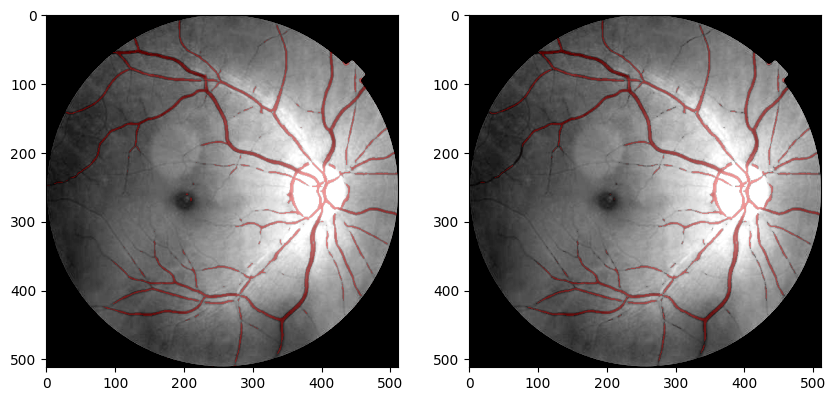

In [69]:
b_no = "132"

image_file_path = "zeus/optical_vessels/exp4_small_data/deploy/epoch_deploy_batch_" + b_no + "_input.jpeg"
mask_file_path = "zeus/optical_vessels/exp4_small_data/deploy/epoch_deploy_batch_" + b_no + "_true_vessels.jpeg"
pred_file_path = "zeus/optical_vessels/exp4_small_data/deploy/epoch_deploy_batch_" + b_no + "_pred_vessels.jpeg"

image_np = np.array(Image.open(image_file_path).convert('L'))
mask_np = np.array(Image.open(mask_file_path).convert('1'))
pred_np = np.array(Image.open(pred_file_path).convert('1'))

plt.subplot(1, 2, 1)
plt.imshow(image_np, cmap='gray', vmin=80, vmax=180)
plt.imshow(mask_np, cmap='hot', alpha=mask_np.astype(np.float32)*0.4, vmin=0.1, vmax=3.0)

plt.subplot(1, 2, 2)
plt.imshow(image_np, cmap='gray', vmin=80, vmax=180)
plt.imshow(pred_np, cmap='hot', alpha=mask_np.astype(np.float32)*0.4, vmin=0.1, vmax=3.0)


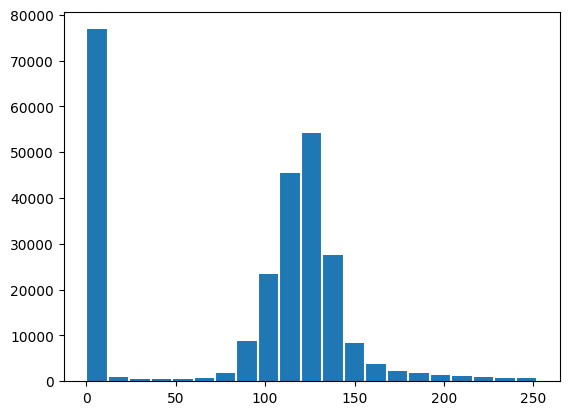

In [25]:
irange = np.max(image_np) - np.min(image_np)

counts, edges = np.histogram(image_np, bins=range(int(np.min(image_np)), int(np.max(image_np)), irange//20))

plt.stairs(counts, edges, fill=True)
plt.vlines(edges, 0, counts.max(), colors='w')